In [5]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

from tensorflow.keras.datasets import mnist

from tensorflow.keras.utils import to_categorical

In [6]:
(x_train, t_train), (x_test, t_test) = mnist.load_data()

print('')
print('x_train.shape : {0}, t_train.shape : {1}'.format(x_train.shape, t_train.shape))
print('x_test.shape : {0}, t_test.shape : {1}'.format(x_test.shape, t_test.shape))


x_train.shape : (60000, 28, 28), t_train.shape : (60000,)
x_test.shape : (10000, 28, 28), t_test.shape : (10000,)


<function matplotlib.pyplot.show>

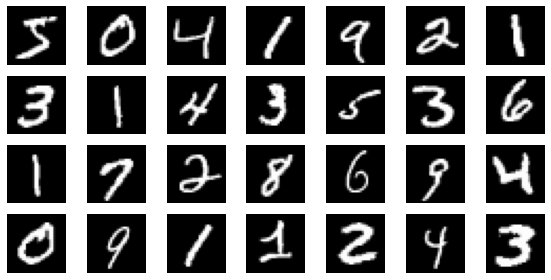

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))

for index in range(28):
    plt.subplot(4, 7, index+1)
    plt.imshow(x_train[index], cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show

In [8]:
# Normalize 0 ~ 1

x_train = x_train / 255.0
x_test = x_test / 255.0

print('train max : {0}, train min : {1}'.format(x_train.max(), x_train.min()))
print('test max : {0}, test min : {1}'.format(x_test.max(), x_test.min()))

train max : 1.0, train min : 0.0
test max : 1.0, test min : 0.0


In [9]:
# # one-hot encoding
# t_train = to_categorical(t_train, 10)
# t_test = to_categorical(t_test, 10)

# print('train label : {0}, train value : {1}'.format(t_train[0], np.argmax(t_train[0])))
# print('test label : {0}, test value : {1}'.format(t_test[0], np.argmax(t_test[0])))

In [10]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [11]:
from tensorflow.keras.optimizers import SGD, Adam

model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
hist = model.fit(x_train, t_train, epochs=30, validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 8s 3ms/step - loss: 0.3064 - accuracy: 0.9137 - val_loss: 0.1669 - val_accuracy: 0.9523
Epoch 2/30
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1436 - accuracy: 0.9585 - val_loss: 0.1263 - val_accuracy: 0.9637
Epoch 3/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1017 - accuracy: 0.9705 - val_loss: 0.1080 - val_accuracy: 0.9686
Epoch 4/30
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0760 - accuracy: 0.9774 - val_loss: 0.0986 - val_accuracy: 0.9706
Epoch 5/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0591 - accuracy: 0.9828 - val_loss: 0.0945 - val_accuracy: 0.9706
Epoch 6/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0468 - accuracy: 0.9858 - val_loss: 0.0910 - val_accuracy: 0.9754
Epoch 7/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0370 - accuracy: 0.9896 - val_loss: 0.0879 - val_accuracy:

In [13]:
model.evaluate(x_test, t_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1181 - accuracy: 0.9771


[0.11808312684297562, 0.9771000146865845]

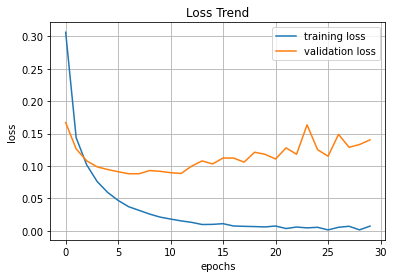

In [14]:
plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='training loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')

plt.show()

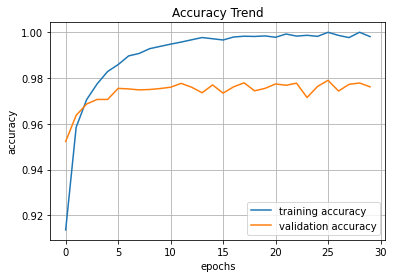

In [15]:
plt.title('Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='training accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()